# Perfect Pandemic Policy, A data-driven guide to future policymakers.
## Introduction

https://hackmd.io/@c5LwW0EgQOyrXSRhnAaEfA/BkCtMlEmn
https://gitfront.io/r/user-2218066/4SV1rqfXtRRi/BEE2041-Problem4/

The COVID-19 pandemic was the first of its kind for everyone, globally, including our governments all over the world. The widespread impact on virtually every country, with millions of cases and thousands of deaths, warranted unprecedented responses from governments globally. They aimed to slow the spread of the virus, protect their citizens, and support their economies.
Now, we can consider one of the most prevalent elements of the pandemic: The stringent rules and regulations that impacted us all. During the global chaos, the constant changing of policy responses confused the public and politicians. Additionally, can we trust that our governments made data-driven decisions effectively based on the soundness of some of their numerical literacy?

> "Eh? So what is 0.04 if it is not a percentage?" - Boris Johnson ^1^

Therefore I have embarked on an investigation to piece the events of the past three years back together into how effective different policies have been, how different governments have varied their responses at different times and which responses were the best. The outcome of this investigation is a guide to future policymakers, should they encounter a pandemic in what and what not to do when implementing policies and how to use data to inform their decision-making.

## Method

This guide combines two incredibly complimentary datasets, the first: Our World In Data's Covid-19 ^2^ dataset, which is an exhaustive recording with 3+ years of data on all covid related metrics one could think of, per day, per country.

What it does lack, unfortunately, is government response differentiation. The Oxford covid-19 government response tracker^3^ quantifies the level of different policy responses, allowing comparisons between countries.

It includes information on 21 live indicators that can be split into four different categories:

1. Containment and closure policies
2. Economic policies
3. Health system policies
4. Vaccine policies.

The technical methodology of this guide includes some administrative tasks, such as importing all the Python libraries and creating dictionaries so that there is consistency in the plots and the data preparation, including the merging of the two datasets. To keep the less technically inclined readers, I will only delve into the specific methodology for some of the code used in this guide. I will, however, comment on the code thoroughly so that other people can understand it than just myself.

### DATASETS
The OWID and Oxford Datasets both include rows for each country for each day over a similar period. The Column values in the OWID dataset are all relatively self-explanatory. By contrast, it is important to make clear what each "policy" is and how their strengths are measured in the Oxford response tracker. I have included a codebook with only the relevant variables to the version of the dataset I downloaded made from the project's own codebook ^4^.


#### Containment and closure policies
| ID | Name | Description | Coding |
| --- | --- | --- | --- |
| C1 | `C1M_School closing`| Record closings of schools and universities | 0 - no measures <br/>1 - recommend closing or all schools open with alterations resulting in significant differences compared to non-Covid-19 operations <br/>2 - require closing (only some levels or categories, eg just high school, or just public schools) <br/>3 - require closing all levels <br/>Blank - no data |
| C2 |`C2M_Workplace closing` | Record closings of workplaces |  0 - no measures <br/>1 - recommend closing (or recommend work from home) or all businesses open with alterations resulting in significant differences compared to non-Covid-19 operation <br/>2 - require closing (or work from home) for some sectors or categories of workers <br/>3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors) <br/>Blank - no data |
| C3 |`C3M_Cancel public events` | Record cancelling public events |  0 - no measures <br/>1 - recommend cancelling <br/>2 - require cancelling <br/>Blank - no data |
| C4 | `C4M_Restrictions on gatherings` | Record limits on gatherings | 0 - no restrictions <br/>1 - restrictions on very large gatherings (the limit is above 1000 people) <br/>2 - restrictions on gatherings between 101-1000 people <br/>3 - restrictions on gatherings between 11-100 people <br/>4 - restrictions on gatherings of 10 people or less <br/>Blank - no data |
| C5 | `C5M_Close public transport` | Record closing of public transport | 0 - no measures <br/>1 - recommend closing (or significantly reduce volume/route/means of transport available) <br/>2 - require closing (or prohibit most citizens from using it) <br/>Blank - no data |
| C6 | `C6M_Stay at home requirements` | Record orders to "shelter-in-place" and otherwise confine to the home | 0 - no measures <br/>1 - recommend not leaving house <br/>2 - require not leaving house with exceptions for daily exercise, grocery shopping, and 'essential' trips <br/>3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc) <br/>Blank - no data |
| C7 |`C7M_Restrictions on internal movement` | Record restrictions on internal movement between cities/regions |  0 - no measures <br/>1 - recommend not to travel between regions/cities <br/>2 - internal movement restrictions in place <br/>Blank - no data |
| C8 | `C8EV_International travel controls` | Record restrictions on international travel <br/><br/>Note: this records policy for foreign travellers, not citizens | 0 - no restrictions <br/>1 - screening arrivals <br/>2 - quarantine arrivals from some or all regions <br/>3 - ban arrivals from some regions <br/>4 - ban on all regions or total border closure <br/>Blank - no data |

#### Economic policies

| ID | Name | Description | Coding |
| --- | --- | --- | --- |
| E1 | `E1_Income support` | Record if the government is providing direct cash payments to people who lose their jobs or cannot work. <br/><br/>Note: only includes payments to firms if explicitly linked to payroll/salaries |  0 - no income support <br/>1 - government is replacing less than 50% of lost salary (or if a flat sum, it is less than 50% median salary) <br/>2 - government is replacing 50% or more of lost salary (or if a flat sum, it is greater than 50% median salary) <br/>Blank - no data |
| E2 | `E2_Debt/contract relief` | Record if the government is freezing financial obligations for households (eg stopping loan repayments, preventing services like water from stopping, or banning evictions) |  0 - no debt/contract relief <br/>1 - narrow relief, specific to one kind of contract <br/>2 - broad debt/contract relief |
| E3 | `E3_Fiscal measures` | Announced economic stimulus spending <br/><br/>Note: only record amount additional to previously announced spending | Record monetary value in USD of fiscal stimuli, includes any spending or tax cuts NOT included in E4, H4 or H5 <br/>0 - no new spending that day <br/>Blank - no data |
| E4 | `E4_International support` | Announced offers of Covid-19 related aid spending to other countries <br/><br/>Note: only record amount additional to previously announced spending | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |

#### Health System Policies
| ID | Name | Description |  Coding |
|----| --- | --- | --- |
| H1 | `H1_Public information campaigns` | Record presence of public info campaigns | 0 - no Covid-19 public information campaign <br/>1 - public officials urging caution about Covid-19 <br/>2- coordinated public information campaign (eg across traditional and social media) <br/>Blank - no data |
| H2 | `H2_Testing policy`| Record government policy on who has access to testing <br/><br/>Note: this records policies about testing for current infection (PCR tests) not testing for immunity (antibody test) | 0 - no testing policy <br/>1 - only those who both (a) have symptoms AND (b) meet specific criteria (eg key workers, admitted to hospital, came into contact with a known case, returned from overseas) <br/>2 - testing of anyone showing Covid-19 symptoms <br/>3 - open public testing (eg "drive through" testing available to asymptomatic people) <br/>Blank - no data |
| H3 | `H3_Contact tracing` | Record government policy on contact tracing after a positive diagnosis <br/><br/>Note: we are looking for policies that would identify all people potentially exposed to Covid-19; voluntary bluetooth apps are unlikely to achieve this | 0 - no contact tracing <br/>1 - limited contact tracing; not done for all cases <br/>2 - comprehensive contact tracing; done for all identified cases |
| H4 | `H4_Emergency investment in healthcare` | Announced short term spending on healthcare system, eg hospitals, masks, etc <br/><br/>Note: only record amount additional to previously announced spending | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |
| H5 | `H5_Investment in vaccines` <br/>*no differentiated policies reported in this indicator | Announced public spending on Covid-19 vaccine development <br/><br/>Note: only record amount additional to previously announced spending | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |
| H6 | `H6M_Facial coverings` | Record policies on the use of facial coverings outside the home <br/> |  0 - No policy <br/>1 - Recommended <br/>2 - Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible <br/>3 - Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible <br/>4 - Required outside the home at all times regardless of location or presence of other people |
| H7 | `H7_Vaccination policy` | Record policies for vaccine delivery for different groups <br/> | 0 - No availability <br/>1 - Availability for ONE of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups <br/>2 - Availability for TWO of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups <br/>3 - Availability for ALL of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups <br/>4 - Availability for all three plus partial additional availability (select broad groups/ages) <br/>5 - Universal availability |
| H8 | `H8M_Protection of elderly people` | Record policies for protecting elderly people (as defined locally) in Long Term Care Facilities and/or the community and home setting | 0 - no measures <br/>1 - Recommended isolation, hygiene, and visitor restriction measures in LTCFs and/or elderly  people to stay at home <br/>2 - Narrow restrictions for isolation, hygiene in LTCFs, some limitations on external visitors and/or restrictions protecting elderly people at home <br/>3 - Extensive restrictions for isolation and hygiene in LTCFs, all non-essential external visitors prohibited, and/or all elderly people required to stay at home and not leave the home with minimal exceptions, and receive no external visitors <br/>Blank - no data |

#### Vaccine Policies

| ID | Name | Description | Coding |
| --- | --- | --- | --- |
| V1 | `V1_Vaccine prioritisation (summary)` | Reports the existence of a prioritised plan for vaccine rollout |  Blank – no data <br/>0 - no plan <br/> 1 – a prioritised plan is in place <br/>2 – universal/general eligibility; no prioritisation between groups |
| V2A | `V2_Vaccine eligibility/availability (summary)` | Reports whether any categories of people are receiving vaccines | Blank – no data <br/>0 – no categories  are receiving vaccines <br/>1 – vaccines are available to some categories <br/>2 – vaccines are available to anyone over the age of 16 yrs <br/>3 – vaccines are available to anyone over the age of 16 yrs PLUS one or both of 5-15 yrs and 0-4 yrs |
| V3 | `V3_Vaccine financial support (summary)` | Reports the overall approach taken to vaccine funding – whether paid by the individual or the government | Blank - no data <br/>0 – no availability <br/> 1 – full cost to the individual for all categories identified in V2 <br/> 2 – full cost to the individual for some categories identified in V2, some subsidy for other categories <br/> 3- partial funding by the government for all of the categories identified in V2 <br/> 4 – partial funding by the government for some categories identified in V2, full funding for other categories <br/> 5 – all categories fully funded by the government |
| V4 | `V4_Mandatory Vaccination (summary)` | Reports the existence of a requirement to be vaccinated | Blank - no data <br/>0 – no requirement to be vaccinated <br/> 1 – requirement to be vaccinated is in place for one or more groups |

### Merging the Data
Although to contradict me, One technical part I will be explicit in is the merging of the two datasets. The OWID and Oxford dataset can be merged on two columns the dates and iso-codes. In simple terms, this means that every row where the date matches in both datasets and the ISO Code (GBR for Britain, USA for America) matches will be joined and made into one long row with more columns.

In [1]:
#Importing All Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.dates as mdates
warnings.simplefilter('ignore')

In [2]:
# Load both datasets
df_owid = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/owid-covid-data.csv')
df_oxford = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/OxCGRT_nat_latest.csv')

# Convert the date into the same format so that the data frames can be merged
df_oxford['Date'] = pd.to_datetime(df_oxford['Date'], format='%Y%m%d')
df_oxford['Date'] = df_oxford['Date'].dt.strftime('%Y-%m-%d')

# Merge where isocode matches Country code and date matches Date.
merged_df = pd.merge(df_owid, df_oxford, left_on=['iso_code', 'date'], right_on=['CountryCode', 'Date'])

# Drop unnecessary columns and rename columns
merged_df = merged_df.drop(columns=['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'Date'])
merged_df = merged_df.rename(columns=lambda x: x.replace(' ', '_'))

df = merged_df

In [3]:
#Dictionaries for names, colour and styles for each policy indicator
names_dict = {
    "C1M_School_closing": "School Closing",
    "C2M_Workplace_closing": "Workplace Closing",
    "C3M_Cancel_public_events": "Cancel Public Events",
    "C4M_Restrictions_on_gatherings": "Restrictions on Gatherings",
    "C5M_Close_public_transport": "Close Public Transport",
    "C6M_Stay_at_home_requirements": "Stay at Home Requirements",
    "C7M_Restrictions_on_internal_movement": "Restrictions on Internal Movement",
    "C8EV_International_travel_controls": "International Travel Controls",
    "E1_Income_support": "Income Support",
    "E2_Debt/contract_relief": "Debt/Contract Relief",
    "E3_Fiscal_measures": "Fiscal Measures",
    "E4_International_support": "International Support",
    "H1_Public_information_campaigns": "Public Information Campaigns",
    "H2_Testing_policy": "Testing Policy",
    "H3_Contact_tracing": "Contact Tracing",
    "H4_Emergency_investment_in_healthcare": "Emergency Investment in Healthcare",
    "H5_Investment_in_vaccines": "Investment in Vaccines",
    "H6M_Facial_Coverings": "Facial Coverings",
    "H7_Vaccination_policy": "Vaccination Policy",
    "H8M_Protection_of_elderly_people": "Protection of Elderly People",
    "V1_Vaccine_Prioritisation_(summary)": "Vaccine Prioritisation",
    "V2A_Vaccine_Availability_(summary)": "Vaccine Availability",
    "V3_Vaccine_Financial_Support_(summary)": "Vaccine Financial Support",
    "V4_Mandatory_Vaccination_(summary)": "Mandatory Vaccination"
}
color_dict = {
    "C1M_School_closing": "red",
    "C2M_Workplace_closing": "red",
    "C3M_Cancel_public_events": "red",
    "C4M_Restrictions_on_gatherings": "red",
    "C5M_Close_public_transport": "red",
    "C6M_Stay_at_home_requirements": "red",
    "C7M_Restrictions_on_internal_movement": "red",
    "C8EV_International_travel_controls": "red",
    "E1_Income_support": "blue",
    "E2_Debt/contract_relief": "blue",
    "E3_Fiscal_measures": "blue",
    "E4_International_support": "blue",
    "H1_Public_information_campaigns": "green",
    "H2_Testing_policy": "green",
    "H3_Contact_tracing": "green",
    "H4_Emergency_investment_in_healthcare": "green",
    "H5_Investment_in_vaccines": "green",
    "H6M_Facial_Coverings": "green",
    "H7_Vaccination_policy": "green",
    "H8M_Protection_of_elderly_people": "green",
    "V1_Vaccine_Prioritisation_(summary)": "purple",
    "V2A_Vaccine_Availability_(summary)": "purple",
    "V3_Vaccine_Financial_Support_(summary)": "purple",
    "V4_Mandatory_Vaccination_(summary)": "purple"
}
style_dict = {
    "C1M_School_closing": "-",
    "C2M_Workplace_closing": "--",
    "C3M_Cancel_public_events": "-.",
    "C4M_Restrictions_on_gatherings": ":",
    "C5M_Close_public_transport": "-",
    "C6M_Stay_at_home_requirements": "--",
    "C7M_Restrictions_on_internal_movement": "-.",
    "C8EV_International_travel_controls": ":",
    "E1_Income_support": "-",
    "E2_Debt/contract_relief": "--",
    "E3_Fiscal_measures": "-.",
    "E4_International_support": ":",
    "H1_Public_information_campaigns": "-",
    "H2_Testing_policy": "--",
    "H3_Contact_tracing": "-.",
    "H4_Emergency_investment_in_healthcare": ":",
    "H5_Investment_in_vaccines": "-",
    "H6M_Facial_Coverings": "--",
    "H7_Vaccination_policy": "-.",
    "H8M_Protection_of_elderly_people": ":",
    "V1_Vaccine_Prioritisation_(summary)": "-",
    "V2A_Vaccine_Availability_(summary)": "--",
    "V3_Vaccine_Financial_Support_(summary)": "-.",
    "V4_Mandatory_Vaccination_(summary)": ":"
}

## Part 1: Cases vs Deaths: What influenced government responses?

The obvious starting point in this investigation would be to try and find which metric was most responsible for guiding government responses. In this, we can measure the stringency index, which is described by our world in data as a composite measure of nine of the response metrics.

In [4]:
# List of ISO codes for the countries to be plotted
isocodes = ['GBR', 'CHL', 'KOR', 'FRA']

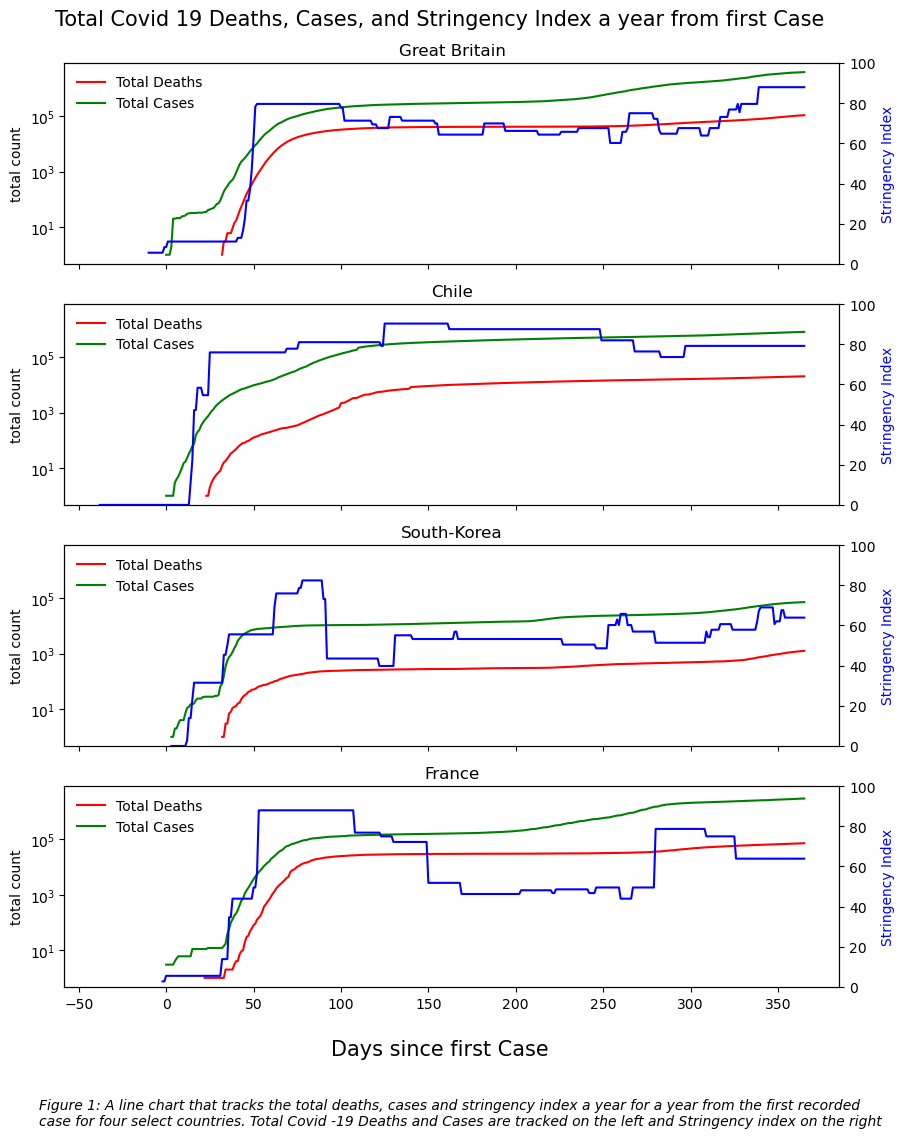

In [5]:
def make_dfs(x):
    # Filter data for the given ISO code and calculate days since first vaccination
    y = df[df['iso_code'].str.contains(x)]
    y['date'] = y['date'].apply(pd.to_datetime)
    y['Days Since 1st Case'] = (y['date'] - (y.loc[df['total_cases'] >= 1, 'date'].iloc[0])).dt.days

    # Filter data to only include dates within a certain range and select relevant columns
    y = y[y['Days Since 1st Case'] <= 365]
    y = y[y['Days Since 1st Case'] >= -365]
    y = y[['iso_code', 'total_deaths', 'total_cases', 'stringency_index', 'Days Since 1st Case','date']]

    # Remove any rows with missing data in the stringency_index column and reset index
    y = y[y['stringency_index'].notna()]
    y = y.reset_index(drop=True)

    return y

# Create a figure with 4 subplots, each representing a different country
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(10, 12), sharex=True, sharey=True)
plt.suptitle('Total Covid 19 Deaths, Cases, and Stringency Index a year from first Case', size=15,
             weight='ultralight', y=0.925)
fig.supxlabel('Days since first Case', size=15, y=0.05)

# List of the four subplots
axes = [ax, ax1, ax2, ax3]

# Add plot titles for each subplot
ax.set(title='Great Britain')
ax1.set(title='Chile')
ax2.set(title='South-Korea')
ax3.set(title='France')


for i, z in zip(isocodes, axes):
    axa = z.twinx()

    # Create a DataFrame for the current ISO code and extract relevant columns
    x = make_dfs(i)['Days Since 1st Case']
    y1 = make_dfs(i)['total_deaths']
    y2 = make_dfs(i)['stringency_index']
    y3 = make_dfs(i)['total_cases']

    # Plot total deaths and total vaccinations on the left y-axis
    deaths_line, = z.plot(x, y1, color='r', label='Total Deaths')
    cases_line, = z.plot(x, y3, color='g', label='Total Cases')

    # Plot stringency index on the first right y-axis
    axa.plot(x, y2, color='b')

    # Add y-axis labels and set scales for each axis
    z.set_ylabel('total count', color='black')
    z.set(yscale='log')

    axa.set_ylabel('Stringency Index', color='b')
    axa.set_ylim(0, 100)

    # Customize the ticks
    axa.grid(False)

    # Create a custom legend without Stringency Index and with no border
    legend_lines = [deaths_line, cases_line]
    legend_labels = [line.get_label() for line in legend_lines]
    z.legend(legend_lines, legend_labels, loc='upper left', frameon=False)

caption = 'Figure 1: A line chart that tracks the total deaths, cases and stringency index a year for a year from the first recorded \ncase for four select countries. Total Covid -19 Deaths and Cases are tracked on the left and Stringency index on the right'

fig.text(.1,-.005,caption,fontstyle = 'italic')
plt.show()

From Figure 1 (and these select countries), one can observe that countries all tended to raise the stringency index to a small degree between the recording of the first cases and the first death. Then once faced with a positive total death count, governments (apart from the United Kingdom) more drastically increased the "stringency" of their response as they came to the stark realisation of the gravity of the oncoming pandemic.

Figure 1 also highlights the need to supplement the OWID data with the Oxford dataset, apart from the initial observation about the start of the pandemic. One can't make a definitive conclusion about what drove a government's "stringency" total cases or total deaths. This is for two reasons, collinearity between total deaths and total cases, which is visibly evident and logically sound (more cases would logically mean more deaths), but secondly, because both metrics perhaps guided different policies.

Due to the second reason, it is clear that there is a problem with the "stringency index". This is hardly a surprise. I'm sure many readers and myself included, had the same reaction. "What on earth is a stringency index?". As such, it is imperative that this investigation finds a way to explore individual policies instead of a foreign and newly coined index. Fortunately, I, being the author, had already taken the liberty to merge the dataset with another that has information on government responses at an individual policy level.

## Part 2: Following the Crowd: Which policies were favoured and used by most countries?

With hundreds of countries, each with its own governance, each facing an unprecedented situation, one could perhaps expect a couple of different approaches. And this is what happened in a handful of cases, such as New Zealand, with a strict elimination approach or Sweden, which never shut its primary schools.

Since we have now adopted the scope of observing the data at the individual policy level, I want to be able to gain insight into any implementation, strict implementation and how much a specific policy. I will use school closing, but you can easily change this.

In [6]:
#Set the policy to look at
policy_name = 'School Closing'

In [7]:
#get_column name from policy name
policy = [k for k, v in names_dict.items() if v == policy_name][0]
# count the number of countries that have a non-zero value for the policy (C1M school closing)
non_zero_count = df.loc[df[policy] != 0, "iso_code"].nunique()
# calculate the proportion of countries that have a non-zero value for the policy
total_countries = df["iso_code"].nunique()
proportion_non_zero = non_zero_count / total_countries
# count the number of countries that have a max value
max_value = df[policy].max()
max_value_count = df.loc[df[policy] == max_value, "iso_code"].nunique()
proportion_max_value = max_value_count / total_countries

# Count the number of countries that have changed value on policy more than 3 times
policy_changes = df.loc[df[policy].diff() != 0, ["iso_code", policy]] #new df with only rows where policy change
changes_by_country = policy_changes.groupby("iso_code").count().rename(columns={policy: "count"})
multiple_implementations = (changes_by_country["count"] > 3).sum()
proportion_multiple_implementations = multiple_implementations / total_countries


#Pringtin.
print('Proportion of countries that implemented policy :', proportion_non_zero,
      '\nProportion of countries that implemented policy at max level for respective policy :',proportion_max_value,
      '\nProportion of countries that changed their level of policy more than 3 times :',proportion_multiple_implementations)

Proportion of countries that implemented policy : 1.0 
Proportion of countries that implemented policy at max level for respective policy : 0.956989247311828 
Proportion of countries that changed their level of policy more than 3 times : 0.9408602150537635


Upon reviewing these summary statistics, it is clear that certain policies, such as School Closing, were, in fact, widely adopted. 100% of all the countries in the dataset at some point implemented a School closing policy. Although this contradicts what I said about Sweden not shutting primary schools, this is due to the version of the dataset I used. The actual policy indicator in the data is 'C1M_School_closing' where the 'Majority' value reflects either the policy for everyone (E) or the policy applying to the majority of people fully vaccinated in a country, using vaccination rate data to determine if this is the vaccinated or non-vaccinated part of the population. So as mentioned at the beginning of the guide, one must stay vigilant in interpreting the specific policy indicators.

So with "C1M", otherwise known as School Closing for the majority of the population, it is apparent that 100% of countries implemented this to some degree. Furthermore, 95.70% of countries involved at one point had this policy at the maximum strength, which refers to the codebook we find means "require closing all levels". Additionally, another interesting statistic is that a similarly high proportion (94%) changed the level of implementation for this policy more than 3 times. This final statistic gives an insight into the complexities of policy setting in pandemics and how one can tailor specific policy strengths to fit better.

But how does this compare against other policies? Since we are all about comparing policies at the individual level, it is fitting we must now compare policies at the individual level.

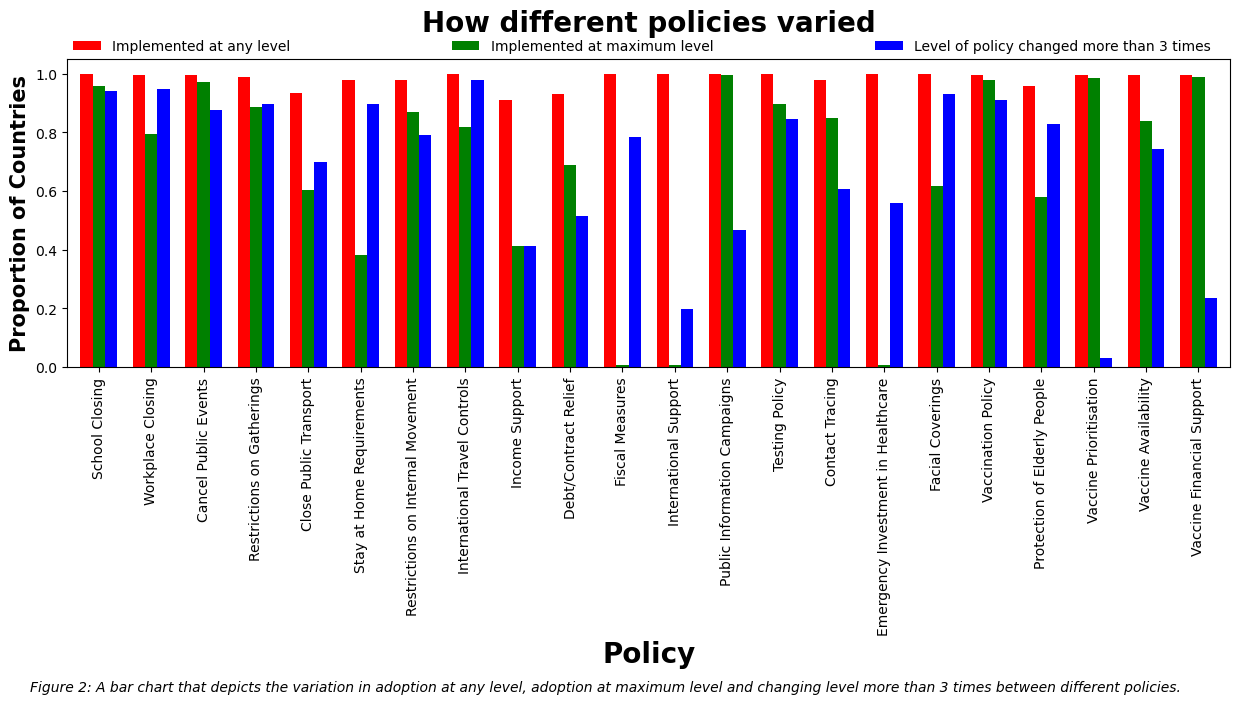

In [8]:
# define a list of policy column names
policies_bar = ["C1M_School_closing",
                "C2M_Workplace_closing",
                "C3M_Cancel_public_events",
                "C4M_Restrictions_on_gatherings",
                "C5M_Close_public_transport",
                "C6M_Stay_at_home_requirements",
                "C7M_Restrictions_on_internal_movement",
                "C8EV_International_travel_controls",
                "E1_Income_support",
                "E2_Debt/contract_relief",
                'E3_Fiscal_measures',
                'E4_International_support',
                "H1_Public_information_campaigns",
                "H2_Testing_policy",
                "H3_Contact_tracing",
                "H4_Emergency_investment_in_healthcare",
                "H6M_Facial_Coverings",
                "H7_Vaccination_policy",
                "H8M_Protection_of_elderly_people",
                "V1_Vaccine_Prioritisation_(summary)",
                "V2A_Vaccine_Availability_(summary)",
                "V3_Vaccine_Financial_Support_(summary)"]

policy_proportions = {}

# loop through each policy and compute the relevant statistics
for policy in policies_bar:
    # get the maximum value of the policy column
    max_value = df[policy].max()

    # count the number of non-zero values in the policy column, grouped by iso_code
    non_zero_count = df.loc[df[policy] != 0, "iso_code"].nunique()

    # count the number of countries where the policy is implemented at the maximum level
    max_value_count = df.loc[df[policy] == max_value, "iso_code"].nunique()

    # count the total number of unique countries in the dataframe
    total_countries = df["iso_code"].nunique()

    # compute the proportion of countries where the policy is implemented at any level
    proportion_non_zero = non_zero_count / total_countries

    # compute the proportion of countries where the policy is implemented at the maximum level
    proportion_max_value = max_value_count / total_countries

    # count the number of times the policy value changes by more than 1 within a country
    policy_changes = df.loc[df[policy].diff() != 0, ["iso_code", policy]]
    changes_by_country = policy_changes.groupby("iso_code").count().rename(columns={policy: "count"})
    multiple_implementations = (changes_by_country["count"] > 3).sum()

    # compute the proportion of countries where the policy value changes by more than 1 more than 3 times
    proportion_multiple_implementations = multiple_implementations / total_countries

    # store the computed statistics in a dictionary
    policy_proportions[policy] = {"Implemented at any level": proportion_non_zero,
                                  "Implemented at maximum level": proportion_max_value,
                                  "Level of policy changed more than 3 times": proportion_multiple_implementations}

# convert the dictionary to a dataframe
policy_df = pd.DataFrame.from_dict(policy_proportions, orient='index')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 4))

# Create a bar chart using policy_df dataframe and set the colors for each bar
policy_df.plot.bar(ax=ax, y=['Implemented at any level', 'Implemented at maximum level', 'Level of policy changed more than 3 times'],
                   color=['r', 'g', 'b'],
                   width=0.7)

# Set the x-label and y-label of the chart
ax.set_xlabel('Policy', size=20,weight = 'bold')
ax.set_ylabel('Proportion of Countries', size=15,weight='bold')

# Set the x-tick labels with the policy names using a generator expression and rotate them 90 degrees
ax.set_xticklabels((names_dict[policy] for policy in policies_bar), rotation=90)

# Add a legend at the top of the chart with 3 columns and expand the width of each column to fill the available space
ax.legend(loc=(0,1), ncol=3, mode='expand', frameon=False)

# Set the title of the chart
plt.title('How different policies varied',
          size=20, pad=20,weight = 'bold')

# Turn off the grid lines
ax.grid(False)



caption = 'Figure 2: A bar chart that depicts the variation in adoption at any level, adoption at maximum level and changing level more than 3 times between different policies.'
fig.text(0.1,-.7,caption,fontstyle = 'italic')

# Show the plot
plt.show()

Figure 2 gives us a much more interesting oversight of the statistics we just uncovered about school closing. In fact, it seems that school closing was one of the most widely adopted at any level, at maximum level and changed more than three times. The first thing that is abundantly clear, it is clearly always worth giving something a try, or at least that's what governments around the world thought, as every policy in the graph above was implemented at some level in 90% of countries.

The figure also allows for insightful comparisons to be made within and between policy groups. Within containment and closure policies, there are significant differences in the proportions of countries implementing max level, such as School Closing and Stay at Home requirements, to which less than 40% of countries implemented at the max level. Once again, referring to the codebook, this level was - required not to leave the house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc).

Between policy groups (Containment and closure policies vs Economic policies), one can notice differences in how many countries changed the policy several times, i.e. how much-tweaking countries did to the policy. Income support and debt/contract relief are both economic policy indicators and have some of the lowest proportions on the graph. Thus is it reasonable to assume these policies were easier to get right, or is it because of legislative and logistical issues with how much tweaking is needed to perfect these policies? Certainly, something to think about the next time we find ourselves having to choose a pandemic policy.

Figure 2 gives us a brilliant insight into variation between overall uptake, hindsight is a brilliant thing, but unfortunately, unprecedented ground meant that several of these policies were non-existent before the pandemic; they can't all have come to fruition at once. Let's roll back the clock to 2020 and incorporate the element of time to see which policies and policy types were most rapidly implemented.

There are three standouts policies, but that is because the way in which Fiscal Support, International Support and Emergency investment into healthcare are measured is slightly different to other policies. They record exact monetary values for given days. So there is not going to be any more than a handful of countries that would match the maximum value in those columns.

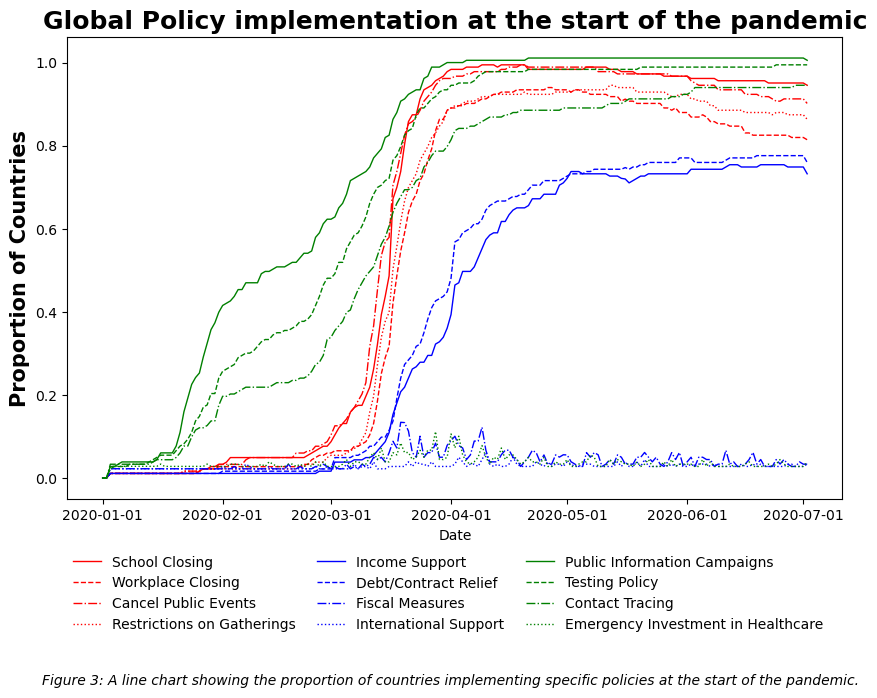

In [9]:
# define a list of policy column names
policies_line = ["C1M_School_closing",
                 "C2M_Workplace_closing",
                 "C3M_Cancel_public_events",
                 "C4M_Restrictions_on_gatherings",
                 "E1_Income_support",
                 "E2_Debt/contract_relief",
                 "E3_Fiscal_measures",
                 "E4_International_support",
                 "H1_Public_information_campaigns",
                 "H2_Testing_policy",
                 "H3_Contact_tracing",
                 "H4_Emergency_investment_in_healthcare",]

# Group the data by date and calculate the proportion of non-zero values for each policy
policy_daily_prop = df.groupby('date')[policies_line].apply(lambda x: (x.ne(0).sum() / x.notna().sum()))
policy_daily_prop = policy_daily_prop.loc['2020-01-01':'2020-07-01']

fig, ax = plt.subplots(figsize=(10, 6))

# Plot a line graph for each policy, with a different color and line style for each
policy_daily_prop.plot(kind="line", ax=ax, lw=1, color=[color_dict[policy] for policy in policies_line], style=[style_dict[policy] for policy in policies_line])

ax.set_xlabel("Date",size = 10)
ax.set_ylabel("Proportion of Countries",size = 15, weight = 'bold')
ax.set_title("Global Policy implementation at the start of the pandemic",size = 18, weight = 'bold')

# Add a legend with the name of each policy, with a layout that adjusts to the number of policies
ax.legend(labels=[names_dict[policy] for policy in policies_line], loc=(0,-0.3), ncol=3, mode='expand', frameon=False)

# Set the tick interval to every first of the month and format the date
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%2020-%m-%d'))

caption = 'Figure 3: A line chart showing the proportion of countries implementing specific policies at the start of the pandemic.'
fig.text(0.1,-.2,caption,fontstyle = 'italic')

ax.grid(False)
plt.show()

Figure 3 allows us to recreate the first six months of 2020. Adding the dimension of time reveals clear trends and differences between policies, especially between policy types. The most immediate reaction, it seems, and the one that gained traction first was Health System Policies (excluding emergency investment in healthcare. Following healthcare policies by March 2020, it became clear to governments that containment and closure policies must be implemented. Accordingly, they were shown by 4 very steep red curves between 2020-03-01 and 2020-04-01. Some economic policies, such as income support and debt/contract relief, were realised to have importance at the same time but slightly less quickly, and more countries felt less inclined to implement these.

As realised in Figure 3, there may be a benefit in some policies that were taken by fewer countries. They required changing less. By May 2020 the countries starting to reduce containment and closure policies started to slowly decline whereas the slower growth Economic policies (Income and Debt/Contract relief) continued at a steady level.

There are three policies in the select ones chosen that never really received widespread uptake in the first seven months. Those are the same three that raised issues in the previous figure and are fiscal measures, international support and emergency investment in healthcare. In this case, what is interesting is that because this graph is not cumulative like the last plot, one can see the quite high score for Countries that changed fiscal measures more than three times, evident in the volatility on the line chart.


## Part 3: The perfect policy bundle

Having uncovered differences between policy types and policy groups in their uptake and how strongly they were implemented, it is only fitting to come back to specific timeframes, to see at the different levels each policy was being implemented at certain points in time. To simplify this, I will combine all the policies within their groups into indices. These indices will be the average relative strength of each policy within their group. So the Containment indicy will represent the average strength of each containment policy; however, since the policy indicators have different 'codes,' we will have to first convert them all into fractions where 0 is not implemented and 1 is implemented at maximum strength.

Since this blog is intended to be a "guide" to future policymakers, we need to decide on dates that we want a snapshot of the policy. As we discovered in Figure 1,  deaths and cases may have guided decision-making with some independence from each other, so we should produce figures for both of those. The dates for the snapshot should then not be compared to the own country's respective total cases or total deaths as the severity of the pandemic varied a lot over 3 years, so a more useful way to define the best and worst scenarios would be relative to the global average.

We can find the best and worst days in terms of new cases and new deaths relative to the global mean for the United Kingdom (or any other country you choose) with the code below:

In [10]:
country = "United Kingdom"

In [11]:
policy_list = ['C1M_School_closing',
               'C2M_Workplace_closing',
               'C3M_Cancel_public_events',
               'C4M_Restrictions_on_gatherings',
               'C5M_Close_public_transport',
               'C6M_Stay_at_home_requirements',
               'C7M_Restrictions_on_internal_movement',
               'C8EV_International_travel_controls',
               'E1_Income_support',
               'E2_Debt/contract_relief',
               'H1_Public_information_campaigns',
               'H2_Testing_policy',
               'H3_Contact_tracing',
               'H6M_Facial_Coverings',
               'H7_Vaccination_policy',
               'H8M_Protection_of_elderly_people',
               'V1_Vaccine_Prioritisation_(summary)',
               'V2A_Vaccine_Availability_(summary)',
               'V3_Vaccine_Financial_Support_(summary)',
               'V4_Mandatory_Vaccination_(summary)']

df_relative_strength = df.copy()
df_relative_strength = df_relative_strength[df_relative_strength['date']>'2020-03-30']

for col in policy_list:
    max_val=df_relative_strength[col].max()
    df_relative_strength[col] = df_relative_strength[col]/max_val

df_relative_strength['Containment_Average']= df_relative_strength[['C1M_School_closing',
                                                                   'C2M_Workplace_closing','C3M_Cancel_public_events','C4M_Restrictions_on_gatherings','C5M_Close_public_transport','C6M_Stay_at_home_requirements', 'C7M_Restrictions_on_internal_movement',
                                                                   'C8EV_International_travel_controls']].mean(axis= 1)
df_relative_strength['Economic_Average'] = df_relative_strength [['E1_Income_support',
                                                                  'E2_Debt/contract_relief',]].mean(axis=1)
df_relative_strength['Health_system_Average'] = df_relative_strength [['H1_Public_information_campaigns',
                                                                       'H2_Testing_policy',
                                                                       'H3_Contact_tracing',
                                                                       'H5_Investment_in_vaccines',
                                                                       'H6M_Facial_Coverings',
                                                                       'H7_Vaccination_policy',
                                                                       'H8M_Protection_of_elderly_people']].mean(axis=1)
df_relative_strength['Vaccination_Average']= df_relative_strength [['V1_Vaccine_Prioritisation_(summary)',
                                                                    'V2A_Vaccine_Availability_(summary)', 'V3_Vaccine_Financial_Support_(summary)', 'V4_Mandatory_Vaccination_(summary)']].mean(axis=1)

# Calculate the global average of new_cases_smoothed_per_million across all countries for each date
global_avg_cases = df_relative_strength.groupby("date")["new_cases_smoothed_per_million"].mean()

# Find the date where the new_cases_smoothed_per_million for the specific isocode is the lowest and highest compared to the global average
lowest_case_date = global_avg_cases.sub(
    df_relative_strength[df_relative_strength["location"] == country].set_index("date")[
        "new_cases_smoothed_per_million"]).idxmax()
highest_case_date = global_avg_cases.sub(
    df_relative_strength[df_relative_strength["location"] == country].set_index("date")[
        "new_cases_smoothed_per_million"]).idxmin()

# Calculate the global average of new_cases_smoothed_per_million across all countries for each date
global_avg_deaths = df_relative_strength.groupby("date")["new_deaths_smoothed_per_million"].mean()

# Find the date where the new_cases_smoothed_per_million for the specific isocode is the lowest and highest compared to the global average
lowest_death_date = global_avg_cases.sub(
    df_relative_strength[df_relative_strength["location"] == country].set_index("date")[
        "new_deaths_smoothed_per_million"]).idxmax()
highest_death_date = global_avg_cases.sub(
    df_relative_strength[df_relative_strength["location"] == country].set_index("date")[
        "new_deaths_smoothed_per_million"]).idxmin()

# Return the date for the lowest and highest new_cases_smoothed_per_million for the specific isocode
print(f"Date with the lowest new cases per million relative to global mean for {country}: {lowest_case_date}")
print(f"Date with the highest new cases per million relative to global mean for {country}: {highest_case_date}")
# Return the date for the lowest and highest new_cases_smoothed_per_million for the specific isocode
print(f"Date with the lowest new deaths per million relative to global mean for {country}: {lowest_death_date}")
print(f"Date with the highest new deaths per million relative to global mean for {country}: {highest_death_date}")

Date with the lowest new cases per million relative to global mean for United Kingdom: 2021-04-15
Date with the highest new cases per million relative to global mean for United Kingdom: 2022-01-06
Date with the lowest new deaths per million relative to global mean for United Kingdom: 2022-01-31
Date with the highest new deaths per million relative to global mean for United Kingdom: 2020-04-15


The output above alone is not incredibly informative. But there is an interesting insight into the difference between deaths and cases. Given that for the UK, the date with the best new cases per million in comparison to global (so when the UK was most effectively utilising policy compared to the rest of the world to combat new cases) is before the date where it was the worst. This means that the UK government didn't necessarily improve its policy allocation over the pandemic. However, when looking at the UK's policy efficiency in targeting new deaths, it was very poor right at the start of the pandemic and at its best after two years. So it improved, although slowly, it still improved in new death targeting policy implementation.

But now, to visualise these dates and the specific bundles in place on these days:

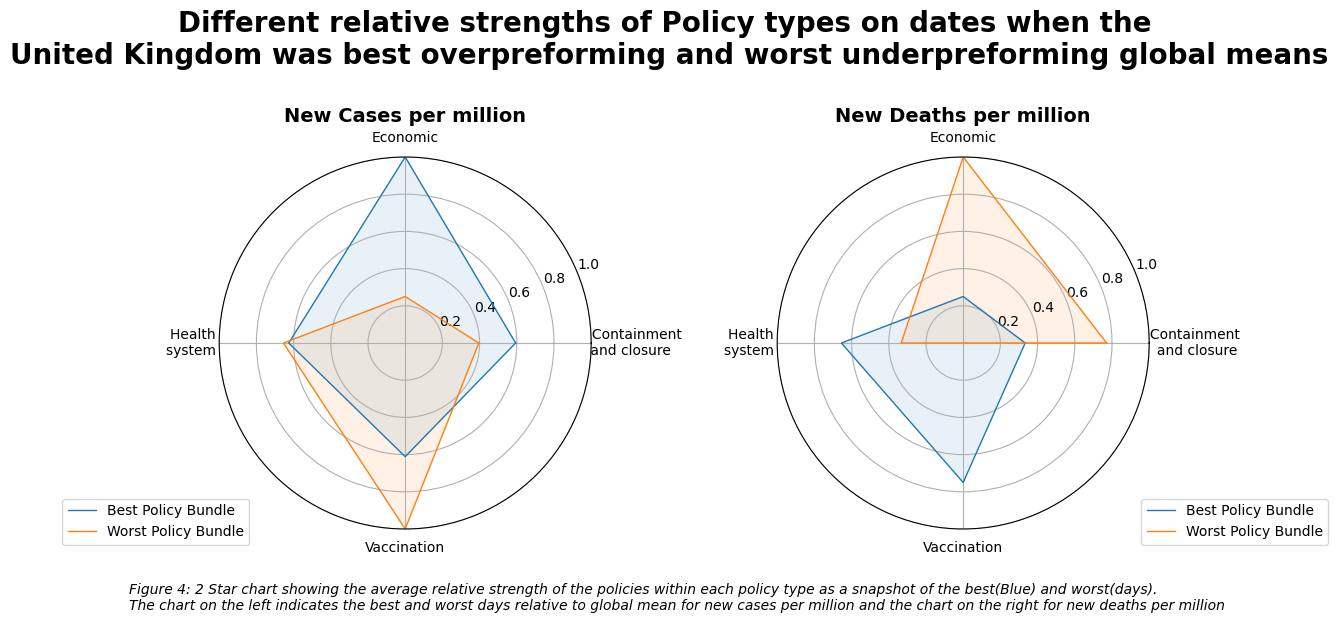

In [12]:
#Only last 4 collumns for new cases
# Step 1: Filter rows for lowest_case_date
data_row1 = df_relative_strength.loc[(df_relative_strength["location"] == country) & (df_relative_strength["date"] == lowest_case_date), ['Containment_Average', 'Economic_Average', 'Health_system_Average', 'Vaccination_Average']]
# Step 2: Filter rows for highest_case_date and concatenate with Step 1
data_row2 = df_relative_strength.loc[(df_relative_strength["location"] == country) & (df_relative_strength["date"] == highest_case_date), ['Containment_Average', 'Economic_Average', 'Health_system_Average', 'Vaccination_Average']]
data = pd.concat([data_row1, data_row2])

data = data.set_index(pd.Index(["Best Policy Bundle", "Worst Policy Bundle"]))
#data = data.set_index('date')
# get the number of variables
categories = list(data.columns)
N = len(categories)
# create a list of angles for the radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
# create the subplots for the radar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': 'polar'})

ax1.set_ylim(0, 1)

# plot the data on the first radar chart
for i in range(len(data)):
    values = data.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax1.plot(angles, values, linewidth=1, linestyle='solid', label=data.index[i])
    ax1.fill(angles, values, alpha=0.1)

# add the legend to the first chart
ax1.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# add the grid and axis labels to the first chart
ax1.set_thetagrids(np.degrees(angles[:-1]), ['             Containment \n         and closure','Economic','Health   \nsystem    ','Vaccination'])
ax1.grid(True)
ax1.set_title('New Cases per million', fontsize=14, fontweight='bold')

#Only last 4 collumns for new deaths
# Step 1: Filter rows for lowest_case_date
data_death_row1 = df_relative_strength.loc[(df_relative_strength["location"] == country) & (df_relative_strength["date"] == lowest_death_date), [ 'Containment_Average', 'Economic_Average', 'Health_system_Average', 'Vaccination_Average']]
# Step 2: Filter rows for highest_case_date and concatenate with Step 1
data_death_row2 = df_relative_strength.loc[(df_relative_strength["location"] == country) & (df_relative_strength["date"] == highest_death_date), [ 'Containment_Average', 'Economic_Average', 'Health_system_Average', 'Vaccination_Average']]
data_death = pd.concat([data_death_row1, data_death_row2])


data_death = data_death.set_index(pd.Index(["Best Policy Bundle", "Worst Policy Bundle"]))
#data_death = data_death.set_index('date')
# get the number of variables
categories = list(data_death.columns)
N = len(categories)
# create a list of angles for the radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# plot the data on the second radar chart
ax2.set_ylim(0, 1)

for i in range(len(data_death)):
    values = data_death.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax2.plot(angles, values, linewidth=1, linestyle='solid', label=data_death.index[i])
    ax2.fill(angles, values, alpha=0.1)

# add the legend to the second chart
ax2.legend(loc='upper right', bbox_to_anchor=(1.5, 0.1))

# add the grid and axis labels to the second chart
ax2.set_thetagrids(np.degrees(angles[:-1]), ['             Containment \n             and closure','Economic','Health   \nsystem    ','Vaccination'])
ax2.grid(True)
ax2.set_title('New Deaths per million', fontsize=14, fontweight='bold')


fig.subplots_adjust(wspace=0.5)
fig.suptitle(('Different relative strengths of Policy types on dates when the \n{} was best overpreforming and worst underpreforming global means\n').format(country),
          size=20,weight = 'bold',y=1.05)

caption = 'Figure 4: 2 Star chart showing the average relative strength of the policies within each policy type as a snapshot of the best(Blue) and worst(days).\nThe chart on the left indicates the best and worst days relative to global mean for new cases per million and the chart on the right for new deaths per million'
fig.text(0.05,.05,caption,fontstyle = 'italic')


# show the plot
plt.show()

The Final figure gives an insight into what type of policy where defining in how well the united kingdom was able to target new cases and new deaths in comparison to the best of the world. Although the Economic Policy average (was only calculated with policies that where measured in indicators not absolute values) it is clear that in the case of the United Kingdom Economic policies such as income support and contract/ debt releif where at maximum strength on the best day for New cases per million and the worst day on new deaths per million. What is evident in effective policy targeting for both deaths and cases are strong vaccination policies. When the UK worst underpreformed the global mean on New deaths per million there were no vaccinations and the policy bundles included strong economic and containment policies. This was in March 2020. There is an obvious reason as to why there were no vaccination policies but this graph still has utility in highlighting that to combat new deaths, health system policies should be implemented stronger on average.

Another great insight, is that in the case of the UK, the vaccination and reliance on vaccination (in that the govornments could reduce the strengths of the other policy types) was effective policy in terms of Deaths, as people where now vaccinated and so dying less, but inneffective policy in terms of targeting new cases.In terms of targeting new cases it seems the average level of Health system policies was relativley uninfluental, but stronger health system policies where better at targeting new deaths.

## Conclusion

The section of the investigation that looked at which metrics influenced government responses during the COVID-19 pandemic found that governments tended to raise the stringency index between the recording of the first cases and the first death, and then increased the "stringency" of their response once faced with a positive total death count. However, because of the collinearity between total deaths and total cases, it was difficult to determine what motivated a government's "stringency" response. Furthermore, the stringency index was found to be problematic because it did not allow for the investigation of individual policies. Overall, this section of the inquiry emphasised the importance of having data at the particular policy level in order to really assess the effectiveness of government responses.

During the COVID-19 pandemic, certain policies, such as school closure, were widely adopted, with 100% of all nations in the dataset enacting a school shutting policy at some point. However, the analysis discovered significant diversity in the strictness of policy implementation and the volatility of individual policies, demonstrating that governments took varied methods to policy implementation even when policies were widely accepted. This section of the inquiry revealed the need of investigating particular policy bundles in order to obtain insight into effective and inneffective government responses during a pandemic.

The study of which policy bundles were most effective during the COVID-19 pandemic discovered that vaccine development had a significant impact on how policymakers adjusted their bundles to target new deaths.  Overall, this section of the inquiry revealed the importance of using data to assess the efficiency of government actions and the importance of making complex policy decisions during a pandemic.

## References
1 https://www.theguardian.com/commentisfree/2023/mar/03/boris-johnson-science-covid-maths-whatapps-advisers
<br/> 2 https://ourworldindata.org/coronavirus
<br/> 3 https://www.bsg.ox.ac.uk/research/covid-19-government-response-tracker
<br/> 4 https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md#containment-and-closure-policies
